# HATCH -- `Domo Arigato Mr. Roboto`

In this hackathon I designed a model that will predict the `history_class` of a user based on multiple differnt criteria. I tried many differnet models before landing on this **sequiental** model. There are many process which I went throught which is explained on the public github --> https://github.com/Kunal2341/HatchHackathon/

In [1]:
#Import Libaries
import os
import time
import json
import ast
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import random
from collections import Counter

In [210]:
os.chdir('..')
#Data files stored in parent directory

In [213]:
os.chdir("/Users/kunal/Documents/AAPersonalAIPROJECT/HATCH")
for i in os.listdir("."):
    print(i)

.ipynb_checkpoints
Bullshit.ipynb
checkpoints
DomArigatoCategoryKey.pdf
DomoArigatoData.txt
DomoArigatoSurvey.pdf
DomoArigatoSurveyNew.pdf
Dom_Arigato_Challenge_Description.pdf
ethnicities.txt
Ignore.ipynb
key.json
lol.ipynb
output.xlsx
Poppler
streamlit.py
testIMG.png
testIMG2.png
Untitled.ipynb
Untitled1.ipynb
VisualizingData .ipynb
VisualizingDataNEW.ipynb


In [215]:
#Import both ethnicity and data files stores in 2d arrays
ethnicities = []
f = open("ethnicities.txt", "r", encoding="utf8")
for x in f:
    ethnicities.append(x[:-1].lower().strip())
arryStrings = []
f = open("DomoArigatoData.txt", "r")
for x in f:
    arryStrings.append(x)

In [216]:
#Quick Check for data  ** Nothing Prints **
for i in arryStrings[1:]:
    if not (i[0:5] == "FALSE" or i[0:4] == "TRUE"):
        print(i)

In [6]:
#Extract Gene from row if exists -- NOT USES
def gene(line, value):
    ct = 0
    while ct < 10:
        if line[ct] == "\t" and line[ct+1] == "\t":
            val= False
            return("No Gene")
            break
        ct+=1
    ct2=0
    string = ""
    while ct2 < 15:
        if line[ct2] == "\t":
            for i in line[ct2+1:]:
                string+=i
                if i =="\t":
                    return(string.replace("\t",""))
                    break
        ct2+=1

In [7]:
# Extracts first 3 columsn of pathognic, gene, and history_class
def calc(line):
    ct = 0
    string1 = ""
    while ct < 30:
        if line[ct] == "\t" and line[ct+1] == "\t":
            #print("No Gene")
            #print(line[ct+2:])
            for i in line[ct+2:]:
                string1+=i
                if i =="\t":
                    #print(string.replace("\t",""))
                    return "No Gene", string1.replace("\t","").strip()
                    break
            break
        ct+=1
    ct2=0
    string = ""
    stringNew = ""
    while ct2 < 15:
        if line[ct2] == "\t":
            ctNew = 0
            for i in line[ct2+1:]:
                string+=i
                if i =="\t":
                    #print(string.replace("\t",""))
                    break
                ctNew+=1
            #print(line[ct2+ctNew+2:])
            for j in line[ct2+ctNew+2:]:
                #print(j)
                stringNew += j
                if j =="\t":
                    #print(stringNew.replace("\t",""))
                    return string.replace("\t","").strip(), stringNew.replace("\t","").strip()
                    break
        ct2+=1

In [217]:
#Imports Data
%%time
convertArray = []
for line in arryStrings[1:]:
    tempArray = []
    if line[0:5].strip().upper() == "FALSE":
        tempArray.append(["Pathogenic", "False"])  
    elif line[0:4].strip().upper() == "TRUE":
        tempArray.append(["Pathogenic", "True"])  
    else:
        raise Exception("Invalid first Value\"{}\"".format(str(line)))
    geneVal, history_classVal = calc(line)
    tempArray.append(["Gene",geneVal])
    tempArray.append(["History_class", history_classVal])
    if not line.find("\"") == -1:
        runOther = line[line.find("\"")+1:len(line)-1]
    for i in runOther.split(";"):
        i = i[:-5] if i.endswith("\t\t\t\t") else i
        details = i.strip().split(":")
        try:
            details[1] = details[1][:-1] if details[1].endswith("\"") else details[1]
            details[1] = json.loads(details[1].replace("\"\"","\""))
        except:
            pass
        tempArray.append(details)
    convertArray.append(tempArray)

UsageError: Line magic function `%%time` not found.


In [220]:
# Quick remove of all the rows that don't follow any sort of order
ctRemoved = 0
pointsRemoved = []
possible = ['Pathogenic','Gene','History_class','consent_approval','ethnicity','cancer_dx','cancer_dx_type','relationships',
            'cancer_dx_age','known_brca','known_cancer','rel_relation','rel_cancer','rel_age', '_method', 'other_cancer']
for singleEntity in convertArray:
    for criteria in singleEntity:
        if not criteria[0] in possible:
            pointsRemoved.append(["Title Wrong", ctPointRemovePointer])
            #print(criteria)
            #print(singleEntity, end="\n\n")
            #convertArray.remove(singleEntity)
            ctRemoved +=1
print("{} different entities due to bad data format out of {}".format(ctRemoved, len(convertArray)))

11 different entities due to bad data format out of 2181


In [10]:
for i in pointsRemoved:
    del convertArray[i[1]]
pointsRemoved = []

# Cleaning up data

Since a lot of the data isn't formatted correctly, there needs a lot of clean up to be done. Each groups for their criteria

### `Pathogenic`

There isn't anything wrong with the `Pathogenic` part of the data so its just a visualization of the **distribution** of the data

5.63 94.37


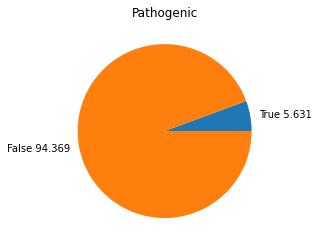

In [11]:
total = len(convertArray)
cttrue = 0
ctfalse = 0
for i in convertArray:
    cttrue += 1 if i[0][1] == 'True' else 0
    ctfalse += 1 if i[0][1] == 'False' else 0
print(round(cttrue/total * 100,2),round(ctfalse/total * 100,2))
plt.title("Pathogenic")
plt.pie([cttrue, ctfalse], labels = ["True " + str(round(cttrue/total * 100,3)), 
                                     "False " + str(round(ctfalse/total * 100,3))])
plt.show()

### `Gene`

This wasn't used in the dataset

In [12]:
possibleGene = ["NCCN", "HBOC", "MEN2", "PTEN", "MEN1", "ACMG", "FAMMM"]

In [13]:
ctGene = 0
for i in possibleGene: 
    if i != 'No Gene': ctGene+=1
lstOfGene = []
for i in convertArray:
    #if i[1][1] != "No Gene": print(i[1][1]) 
    lstOfGene.append(i[1][1])
#print("-"*20)
print("{} different Genes with total {} gene locations".format(len(set(lstOfGene)), ctGene))

26 different Genes with total 7 gene locations


### ```consent_approval```

There are only 2 possible options for this criteria, `yes` and `no` so adjusting all of them to that

In [14]:
for i in convertArray:
    for j in i:
        if j[0] == "consent_approval":
            j[1] = j[1].lower().strip()
            #Printing all possible wrong points
            if j[1] != "yes" and j[1] != "no":
                print(j[1])

### ```ethnicity```

Imports a list of all possible ethnicities and clean up all the incorrect formatting of text and finally spell check if needed

In [15]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [16]:
def ethnicityChange(listofVals):
    listofVals = listofVals.lower().replace("/",",").replace("caucasion","caucasian").replace("american","america").replace("-",",").replace("and",",").replace("&",",").replace("english", "").replace("white", "caucasian").strip().split(",")
    #print(listofVals)
    updated = listofVals
    ct = 0
    for i in listofVals:
        if "not" in i or "non" in i:
            try:
                updated.remove(listofVals[ct+1])
            except:
                pass
        ct+=1

    lst = [value for value in updated if value != ""]
    #print(lst)
    ct = 0
    for j in lst:
        if j != spell.correction(j):
            lst[ct] = spell.correction(j)
            #print(j, spell.correction(j))
        ct+=1
    #print(lst)
    final = []
    for i in lst:
        if i in ethnicities:
            final.append(i)
        else:
            splitFinalVal = i.split(" ")
            for j in splitFinalVal:
                #print(j)
                if j in ethnicities:
                    final.append(j)
        #else:
            #print("Removed: ", i)
    return final

In [17]:
for i in convertArray:
    for j in i:
        if j[0] == "ethnicity":
            answers = ethnicityChange(j[1])
            j[1] = answers

### ```cancer_dx```

Only yes or no answer

In [18]:
for i in convertArray:
    for j in i:
        if j[0] == "cancer_dx":
            j[1] = j[1].lower().strip()

### ```cancer_dx_type```


Due to so less data points we removing this

In [19]:
lstOfCancerDxType = []
for i in convertArray:
    for j in i:
        if j[0] == "cancer_dx_type":
            lstOfCancerDxType.append(j[1])

In [20]:
#Counter(lstOfCancerDxType)

In [21]:
for i in convertArray:
    for j in i:
        if j[0] == "cancer_dx_type":
            j[1] = j[1].lower().strip()
            if j[1] == "":
                j[1] = "-"
            print(j)

['cancer_dx_type', 'pre-cancer vulvar due to hpv']
['cancer_dx_type', 'pre-cancer vulvar due to hpv']
['cancer_dx_type', 'melanoma']
['cancer_dx_type', 'breast']
['cancer_dx_type', 'prostate']
['cancer_dx_type', 'uterine']
['cancer_dx_type', 'triple negative breast cancer']
['cancer_dx_type', 'kidney']
['cancer_dx_type', 'uterine']
['cancer_dx_type', 'melanoma']
['cancer_dx_type', 'breast']
['cancer_dx_type', 'breat']
['cancer_dx_type', 'breast']
['cancer_dx_type', 'breast']
['cancer_dx_type', 'breast']
['cancer_dx_type', 'colon']
['cancer_dx_type', 'breast']
['cancer_dx_type', 'kidney']
['cancer_dx_type', 'breast']
['cancer_dx_type', 'dcis']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', 'skin']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_d

### ```relationships```
Invalid Data

In [22]:
ctPointDelete = 0
for i in convertArray:
    for j in i:
        if j[0] == "relationships":
            #j[1] = j[1].lower().strip()
            pointsRemoved.append(["Relationships",ctPointDelete])
            #print(j[1])
    ctPointDelete+=1

In [23]:
for i in pointsRemoved:
    del convertArray[i[1]]
pointsRemoved = []

### ```cancer_dx_age```
Make sure age can be turned into a int and average if multiple points

In [24]:
ctRemovedAge = 0
for i in convertArray:
    for j in i:
        if j[0] == "cancer_dx_age":
            #j[1] = j[1].replace()
            if type(j[1]) != int and j[1] != '':
                r = j[1].strip().replace("and",",").split(",")
                r = [s.strip() for s in r]
                dele = False
                for vla in r:
                    try:
                        vla = int(vla)
                    except:
                        dele = True
                        convertArray.remove(i)
                        ctRemovedAge+=1
                if not dele: j[1] = int(statistics.mean(map(int, r)) )
print("Deleted {}".format(ctRemovedAge))

Deleted 7


### ```known_brca```
Nothing

In [25]:
for i in convertArray:
    for j in i:
        if j[0] == "known_brca":
            j[1] = j[1].replace("U","unknown").lower().strip()
            #print(j)

### ```rel_relation```

In [26]:
import string

In [27]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [28]:
CounterList = []
exclude = set(string.punctuation + string.digits)
for i in convertArray:
    for j in i:
        if j[0] == "rel_relation":
            #print(j)
            newList = []         
            for valr in j[1]:
                value = valr.lower().replace("paternal","").replace("mom","mother").replace("grandpa","grandfather")
                value = value.replace("grandma","grandmother").replace("first","").replace("dad","father").replace("1st","")
                value = value.replace("maternal","").replace("greatgrandmother", "great grandmother")
                value = value.replace("mothers side","").replace("fathers side","").replace("mother side","").replace("father side","")
                value = value.replace("female","").replace("male","")
                value = value.replace("  ", " ").replace("p ", "").replace("m ", "").replace("f ", "")
                value = ''.join(ch for ch in value if ch not in exclude) 
                value = value[:-1] if value.endswith("s") else value
                newList.append(value.strip())
            if len(newList) > 1 and "" in newList:
                newList.remove("")
            j[1] = list(set(newList))
            CounterList.extend(list(set(newList)))
            #print(j)

In [29]:
A = Counter(CounterList)
r=0
lol = 0
removeLst = []
for key, value in A.items():
    if value > 10:
        #print(key, "\t", value)
        lol+=value
    else:
        r+=1
print("{} different points that have invalid out of {}".format(lol, len(CounterList)))

4674 different points that have invalid out of 4941


In [30]:
possibleRelationship = ["brother", "sister", 
                        "mother","father",
                        "aunt","uncle",
                        "grandfather", "grandmother", 
                        "great aunt", "great uncle",
                        "great grandfather", "great grandmother",
                        "cousin","niece","daughter"]

In [31]:
for i in convertArray:
    for j in i:
        if j[0] == "rel_relation":
            newList = []
            for valr in j[1]:
                if not valr in possibleRelationship:
                    print("Removed\t", valr)
                    newList.append("")
                else:
                    newList.append(valr)
            newList = list(set(newList))
            if ("" in newList) and (not "" in newList) and len(newList) != 1:
                newList.remove("")
            j[1] = newList
            #print(j)
#possibleRelationship.append("")

Removed	 
Removed	 uncle fathers brother
Removed	 cousin halcousin
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 son
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 breast
Removed	 kidney
Removed	 ovarian
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 grandmother pancreatic
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 greatgrandfarher
Removed	 grandmither
Removed	 
Removed	 aunts
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 halaunt
Removed	 
Removed	 grandmothers mother
Removed	 
Removed	 
Removed	 grandfathers brother
Removed	 grandmothers sister
Removed	 grandfathers only sisters oldest daughter
Removed	 grandmothers mother
Removed	 grandfathers sister
Removed	 grandfathers only sisters younger daughter
Removed	 
Removed	 
Removed	 mamaw
Removed	 
Removed	 aunt mothers sister
Removed	 
Removed	 son
Removed	 
Removed	 cousinmothers side
Removed	 auntmothers sister
Removed	

Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 
Removed	 


### ```rel_cancer```

In [32]:
def findObject(string):
    import spacy
    nlp = spacy.load("en_core_web_sm")
    doc =nlp('not sure what kind of  she had')
    lst = []
    for np in doc.noun_chunks:
        lst.append(np.text)
    return lst

In [33]:
for i in convertArray:
    for j in i:
        if j[0] == "rel_cancer":
            print(j)

['rel_cancer', ['Ovarian', 'Leukemia CML', 'Bladder ', 'Squamous Cell Carcinoa', 'Breast Cancer', 'Liver Cancer', 'Breast']]
['rel_cancer', ['Ovarian', 'Leukemia CML', 'Bladder ', 'Squamous Cell Carcinoa', 'Breast Cancer', 'Liver Cancer', 'Breast']]
['rel_cancer', ['', '', '']]
['rel_cancer', ['Colon', 'Uterine ', 'Colon']]
['rel_cancer', ['he died of lymphoma at 86', 'prostae', '']]
['rel_cancer', ['colon', 'colon', 'colon', 'breast', 'brain', 'brain']]
['rel_cancer', ['lung', 'breast/bladder', 'breast', 'pancreatic ', 'lymphoma ', 'bladder', 'lung']]
['rel_cancer', ['Lung', 'Breast', 'Skin']]
['rel_cancer', ['Uterine Cancer', 'Uterine Cancer', 'Colon, prostate, liver']]
['rel_cancer', ['salivary gland', 'leukemia', 'colon']]
['rel_cancer', ['tonsil', 'larynx/tongue', 'colon', 'skin (nose)', 'breast', 'brain']]
['rel_cancer', ['Squamous Cell Carcinoma', 'Prostate', 'Breast Cancer']]
['rel_cancer', ['breast', '', '']]
['rel_cancer', ['Breast', 'Bile Duct', '']]
['rel_cancer', ['adenoca

['rel_cancer', ['Colon', 'Breast ', 'Lung']]
['rel_cancer', ['Breast', 'Breast', '']]
['rel_cancer', ['HISTOCYTIC LYMPHOMA', 'HODGKINS', 'PLASMA CYTOMA, MULTMA MYALOMA', 'PROSTATE CANCER', 'ADULT LUKEMEA', 'BRAIN CANCER']]
['rel_cancer', ['Prostrate ', 'Skin', 'Pancreatic ', 'Brain']]
['rel_cancer', ['Oral', 'Colon', 'Colon']]
['rel_cancer', ['Maloma ', 'Breast', '']]
['rel_cancer', ['colon', 'melanoma', '']]
['rel_cancer', ['breast cancer', 'ovarian cancer', 'leukemia']]
['rel_cancer', ['Bladder', 'Breast', 'Colon', 'Colon', 'Skin', 'Skin']]
['rel_cancer', ['Brain', 'Ovarian', 'Ovarian Brain', 'Luekemia']]
['rel_cancer', ['Colon', 'Skin', '']]
['rel_cancer', ['liver', 'lung, kidney, ', 'leukemia']]
['rel_cancer', ['Breast ', 'Testicular', '']]
['rel_cancer', ['breast', 'breast', 'uterine', '']]
['rel_cancer', ['breast', 'bladder', 'skin']]
['rel_cancer', ['unknown, was in for gall balder surgery and discovered "eaten-up" with cancer', 'Breast cancer, both breasts', 'Stage 4 NSC lung c

['rel_cancer', ['breast', 'skin', '']]
['rel_cancer', ['Stomach Cancer', 'Colin Cancer', '5 Benign cysts removed from her breasts ', 'Prostrate Cancer']]
['rel_cancer', ['skin', 'skin', 'leukemia', 'prostate']]
['rel_cancer', ['gallbladder', 'esophageal', '']]
['rel_cancer', ['colon', 'lung', 'Medullary thryoid', 'Leukemia']]
['rel_cancer', ['colon', '', '']]
['rel_cancer', ['Colon', '', '']]
['rel_cancer', ['Breast', 'Lung', 'Colon']]
['rel_cancer', ['Breast', 'Thyroid', 'Breast']]
['rel_cancer', ['breast', 'breast', '']]
['rel_cancer', ['Colon', 'Breast', '']]
['rel_cancer', ['adenocarcinoma of ampulla of vate', 'breast', 'stomach']]
['rel_cancer', ['Cervical', 'Prostate', 'Breast']]
['rel_cancer', ['breast', 'lung', 'pancreatic', 'multiple myeloma', 'lung', 'lung']]
['rel_cancer', ['Bile duct', '', '']]
['rel_cancer', ['Ovarian', 'Uterine', '']]
['rel_cancer', ['Breast', 'Multiple myeloma', 'Squamous cell cancer']]
['rel_cancer', ['breast', '', '']]
['rel_cancer', ['Lung', 'Breast',

['rel_cancer', ['', '', '']]
['rel_cancer', ['Cervical Cancer', 'Lung Cancer', 'Lung Cancer']]
['rel_cancer', ['', '', '']]
['rel_cancer', ['adenovarcinoma lung', '', '']]
['rel_cancer', ['squamous cell carcinoma (nasal septum', 'bone', '']]
['rel_cancer', ['Throat & Sinus', 'Prostate', 'Lymphomia']]
['rel_cancer', ['thyroid ', 'skin cancer', '']]
['rel_cancer', ['', '', '']]
['rel_cancer', ['', '', '']]
['rel_cancer', ['Lung cancer', 'Skin cnancer', '']]
['rel_cancer', ['lung cancer', '', '']]
['rel_cancer', ['Unknown', '', '']]
['rel_cancer', ['', '', '']]
['rel_cancer', ['', '', '']]
['rel_cancer', ['', '', '']]
['rel_cancer', ['', '', '']]
['rel_cancer', ['', '', '']]
['rel_cancer', ['Vaginal ', '', '']]
['rel_cancer', ['', '', '']]
['rel_cancer', ['', '', '']]
['rel_cancer', ['', '', '']]
['rel_cancer', ['Leukemia', '', '']]
['rel_cancer', ['Throat Cancer', 'Stomach Cancer', 'Skin Cancer']]
['rel_cancer', ['', '', '']]
['rel_cancer', ['Lung', '', '']]
['rel_cancer', ['', '', '']]


In [34]:
exclude = set(string.punctuation + string.digits)
CounterListCancer = []
for i in convertArray:
    for j in i:
        if j[0] == "rel_cancer":
            tst = []
            #print(j[1])
            for valr in j[1]:
                point = valr.lower().replace("cancer","").replace("prostrate","prostate").replace("unknown","").replace("multiple","").replace("leukemia cml", "leukemia").replace("tumor","").strip()
                point = ''.join(ch for ch in point if ch not in exclude)
                tst.append(point)
            if len(tst) > 1 and "" in tst:
                tst.remove("")
            #j[1] = list(set(newList))
            CounterListCancer.extend(list(set(tst)))

In [35]:
relCancerPoss = ["bile duct", "bladder", "bone", "brain", "breast", "cervical", "colon", "colorectal", "endometrial", 
                 "esophageal", "kidney", "leukemia", "liver", "lung", "lymphoma", "melanoma", "mesothelioma", "mouth", 
                 "myeloma", "non hodgkins lymphoma", "ovarian", "pancreas", "pancreatic", "prostate", "prostrate", "rectal",
                 "skin", "stomach", "testicular", "throat", "thyroid", "uterine"]

In [36]:
A = Counter(CounterListCancer)
r=0
lol = 0
removeLst = []
for key, value in A.items():
    if value < 10:
        #print(key, "\t", value)
        lol+=value
    else:
        r+=1
print("{} different points that have invalid out of {}".format(lol, len(CounterListCancer)))

828 different points that have invalid out of 4880


In [37]:
%%time
R = []
relCancerPoss = ["bile duct", "bladder", "bone", "brain", "breast", "cervical", "colon", "colorectal", "endometrial", 
                 "esophageal", "kidney", "leukemia", "liver", "lung", "lymphoma", "melanoma", "mesothelioma", "mouth", 
                 "myeloma", "non hodgkins lymphoma", "ovarian", "pancreas", "pancreatic", "prostate", "prostrate", "rectal",
                 "skin", "stomach", "testicular", "throat", "thyroid", "uterine"]
exclude = set(string.punctuation + string.digits)
for i in convertArray:
    for j in i:
        if j[0] == "rel_cancer":
            tst = []
            #print(j[1])
            for valr in j[1]:
                point = valr.lower().replace("cancer","").replace("prostrate","prostate").replace("unknown","").replace("multiple","").replace("leukemia cml", "leukemia").replace("tumor","").strip()
                point = ''.join(ch for ch in point if ch not in exclude)
                #print(point)
                for i in relCancerPoss:
                    if i in point:
                        point = i  
                if not point in relCancerPoss and point != "":
                    spellChange = spell.correction(point)
                    if point != spellChange:
                        point = spellChange
                    else:
                        point = ""
                tst.append(point)
            if len(tst) > 1 and "" in tst:
                tst.remove("")
            j[1] = list(set(tst))
            print(j)
            R.extend(j[1])
#relCancerPoss.append("")

['rel_cancer', ['leukemia', 'breast', 'ovarian', 'bladder', 'liver']]
['rel_cancer', ['leukemia', 'breast', 'ovarian', 'bladder', 'liver']]
['rel_cancer', ['']]
['rel_cancer', ['colon', 'uterine']]
['rel_cancer', ['prostate', 'lymphoma']]
['rel_cancer', ['brain', 'breast', 'colon']]
['rel_cancer', ['breast', 'lung', 'bladder', 'pancreatic', 'lymphoma']]
['rel_cancer', ['breast', 'lung', 'skin']]
['rel_cancer', ['colon', 'uterine']]
['rel_cancer', ['leukemia', 'colon']]
['rel_cancer', ['', 'breast', 'brain', 'skin', 'colon']]
['rel_cancer', ['breast', 'prostate']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['breast', 'bile duct']]
['rel_cancer', ['', 'lung']]
['rel_cancer', ['']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['']]
['rel_cancer', ['breast', 'prostate']]
['rel_cancer', ['breast', 'cervical', 'uterine']]
['rel_cancer', ['', 'stomach', 'leukemia', 'breast', 'ovarian', 'brain', 'lung', 'colon', 'throat', 'cervical']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'pan

['rel_cancer', ['breast', 'skin']]
['rel_cancer', ['breast', 'colon', 'pancreatic']]
['rel_cancer', ['breast']]
['rel_cancer', ['breast']]
['rel_cancer', ['breast', 'ovarian']]
['rel_cancer', ['', 'ovarian']]
['rel_cancer', ['breast', 'ovarian']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['breast', 'kidney', 'lung', 'ovarian']]
['rel_cancer', ['brain', 'breast']]
['rel_cancer', ['breast', 'colon']]
['rel_cancer', ['', 'ovarian']]
['rel_cancer', ['breast', 'colon', 'pancreatic']]
['rel_cancer', ['prostate', 'breast', 'pancreatic']]
['rel_cancer', ['breast', 'skin']]
['rel_cancer', ['', 'breast', 'melanoma']]
['rel_cancer', ['bone', 'breast', 'lung', 'ovarian']]
['rel_cancer', ['colon']]
['rel_cancer', ['breast', 'leukemia', 'lung', 'lymphoma']]
['rel_cancer', ['throat', 'breast', 'lung', 'ovarian']]
['rel_cancer', ['breast', 'ovarian', 'lung', 'colon', 'throat']]
['rel_cancer', ['thyroid', 'breast', 'ovarian']]
['rel_cancer', ['', 'ovarian']]
['rel_cancer', ['', 'breast']]
['rel_can

['rel_cancer', ['breast', 'pancreatic', 'ovarian']]
['rel_cancer', ['breast', 'thyroid', 'ovarian']]
['rel_cancer', ['', 'ovarian']]
['rel_cancer', ['', 'colon']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['breast', 'leukemia']]
['rel_cancer', ['prostate', 'breast', 'pancreatic']]
['rel_cancer', ['prostate', 'uterine']]
['rel_cancer', ['bone', 'colon', 'uterine', 'ovarian']]
['rel_cancer', ['breast']]
['rel_cancer', ['leukemia', 'breast', 'prostate', 'lung', 'colon', 'rectal', 'melanoma']]
['rel_cancer', ['breast', 'brain', 'prostate', 'lung', 'uterine']]
['rel_cancer', ['breast', 'colon', 'lung', 'ovarian']]
['rel_cancer', ['breast', 'colon']]
['rel_cancer', ['colon', 'ovarian']]
['rel_cancer', ['breast', 'kidney', 'ovarian']]
['rel_cancer', ['', 'rectal']]
['rel_cancer', ['bone', 'breast', 'uterine']]
['rel_cancer', ['bone', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['breast', 'prostate', 'ovarian', 'lymphoma']]
['rel_cancer', ['breast']]
['rel_cancer', ['colon', '

['rel_cancer', ['stomach', 'breast', 'lung']]
['rel_cancer', ['breast', 'cal']]
['rel_cancer', ['bone', 'colon']]
['rel_cancer', ['cervical', 'colon']]
['rel_cancer', ['colon', 'bra']]
['rel_cancer', ['ovarian', 'lymphoma']]
['rel_cancer', ['colon', 'prostate', 'uterine']]
['rel_cancer', ['', 'pancreatic', 'lung']]
['rel_cancer', ['breast', 'skin', 'colon', 'kidney', 'pancreatic']]
['rel_cancer', ['breast', 'lung']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['breast', 'colon']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['colon']]
['rel_cancer', ['leukemia', 'lung', 'melanoma']]
['rel_cancer', ['breast', 'colon']]
['rel_cancer', ['', 'colon']]
['rel_cancer', ['breast', 'colon']]
['rel_cancer', ['', 'ovarian']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['breast', 'colon']]
['rel_cancer', ['breast', 'prostate']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['colon', 'lung', 'throat']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]

['rel_cancer', ['']]
['rel_cancer', ['', 'stomach']]
['rel_cancer', ['', 'i']]
['rel_cancer', ['breast', 'lung']]
['rel_cancer', ['colon', 'prostate']]
['rel_cancer', ['breast', 'lung', 'lymphoma']]
['rel_cancer', ['', 'pancreatic']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['breast', 'colon']]
['rel_cancer', ['breast', 'lung']]
['rel_cancer', ['prostate', 'colon', 'skin']]
['rel_cancer', ['', 'bladder']]
['rel_cancer', ['stomach', 'thyroid', 'uterine', 'lung']]
['rel_cancer', ['breast']]
['rel_cancer', ['breast', 'skin']]
['rel_cancer', ['breast', 'skin']]
['rel_cancer', ['leukemia', 'breast']]
['rel_cancer', ['', 'pancreatic']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['breast', 'lung']]
['rel_cancer', ['breast', 'thyroid']]
['rel_cancer', ['breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['colon', 'lung']]
['rel_cancer', ['breast', 'melanoma']]
['rel_cancer', ['', 'colon']]
['rel_cancer', ['', 'breast']]
['rel_can

['rel_cancer', ['', 'breast']]
['rel_cancer', ['breast', 'prostate']]
['rel_cancer', ['breast', 'leukemia']]
['rel_cancer', ['brain', 'breast', 'leukemia']]
['rel_cancer', ['breast', 'cervical']]
['rel_cancer', ['breast', 'lung']]
['rel_cancer', ['breast', 'thyroid']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['']]
['rel_cancer', ['', 'colon']]
['rel_cancer', ['', 'colon']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['brain', '']]
['rel_cancer', ['brain', '']]
['rel_cancer', ['brain', 'breast', 'leukemia']]
['rel_cancer', ['colon', 'skin']]
['rel_cancer', ['', 'prostate']]
['rel_cancer', ['bladder', 'melanoma']]
['rel_cancer', ['breast']]
['rel_cancer', ['', 'breast']]
['rel

['rel_cancer', ['', 'colon']]
['rel_cancer', ['colon', 'lung']]
['rel_cancer', ['kidney', 'veteran']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['ovarian', 'myeloma']]
['rel_cancer', ['breast', 'ovarian']]
['rel_cancer', ['breast', 'prostate']]
['rel_cancer', ['liver', 'breast']]
['rel_cancer', ['testicular', 'breast', 'colon', 'melanoma']]
['rel_cancer', ['breast', 'leukemia', 'lymphoma']]
['rel_cancer', ['stomach', 'bladder']]
['rel_cancer', ['breast', 'throat']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['liver', 'melanoma']]
['rel_cancer', ['brain', 'skin']]
['rel_cancer', ['brain', 'lung']]
['rel_cancer', ['breast', 'lung']]
['rel_cancer', ['']]
['rel_cancer', ['endometrial', '']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'bone']]
['rel_cancer', ['breast', 'colon', 'melanoma']]
['rel_cancer', ['breast', 'lung']]
['rel_cancer', ['prostate', 'lung', 'skin']]
['rel_cancer', [

['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['', 'lung']]
['rel_cancer', ['lung', 'skin']]
['rel_cancer', ['', 'vulgar']]
['rel_cancer', ['lung', 'skin']]
['rel_cancer', ['']]
['rel_cancer', ['', 'lymphoma']]
['rel_cancer', ['lung']]
['rel_cancer', ['liver', 'lymphoma']]
['rel_cancer', ['', 'lung']]
['rel_cancer', ['', 'lung']]
['rel_cancer', ['', 'liver']]
['rel_cancer', ['testicular', 'melanoma']]
['rel_cancer', ['lymphoma', 'melanoma']]
['rel_cancer', ['lung', 'skin']]
['rel_cancer', ['', 'liver']]
['rel_cancer', ['', 'bladder']]
['rel_cancer', ['', 'skin']]
['rel_cancer', ['', 'lung']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer

['rel_cancer', ['', 'prostate']]
['rel_cancer', ['', 'melanoma']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['breast', 'colon']]
['rel_cancer', ['', 'skin']]
['rel_cancer', ['', 'prostate']]
['rel_cancer', ['', 'thyroid']]
['rel_cancer', ['', 'lung']]
['rel_cancer', ['', 'thyroid']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['cervical', 'lung']]
['rel_cancer', ['']]
['rel_cancer', ['', 'lung']]
['rel_cancer', ['', 'bone']]
['rel_cancer', ['prostate', 'throat', 'lymphoma']]
['rel_cancer', ['thyroid', 'skin']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['lung', 'skin']]
['rel_cancer', ['', 'lung']]
['rel_cancer', [

In [38]:
for i in convertArray:
    for j in i:
        if j[0] == "rel_cancer":
            print(j)

['rel_cancer', ['leukemia', 'breast', 'ovarian', 'bladder', 'liver']]
['rel_cancer', ['leukemia', 'breast', 'ovarian', 'bladder', 'liver']]
['rel_cancer', ['']]
['rel_cancer', ['colon', 'uterine']]
['rel_cancer', ['prostate', 'lymphoma']]
['rel_cancer', ['brain', 'breast', 'colon']]
['rel_cancer', ['breast', 'lung', 'bladder', 'pancreatic', 'lymphoma']]
['rel_cancer', ['breast', 'lung', 'skin']]
['rel_cancer', ['colon', 'uterine']]
['rel_cancer', ['leukemia', 'colon']]
['rel_cancer', ['', 'breast', 'brain', 'skin', 'colon']]
['rel_cancer', ['breast', 'prostate']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['breast', 'bile duct']]
['rel_cancer', ['', 'lung']]
['rel_cancer', ['']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['']]
['rel_cancer', ['breast', 'prostate']]
['rel_cancer', ['breast', 'cervical', 'uterine']]
['rel_cancer', ['', 'stomach', 'leukemia', 'breast', 'ovarian', 'brain', 'lung', 'colon', 'throat', 'cervical']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'pan

### ```rel_age```

In [39]:
exclude = set(string.punctuation)
ctdelRel_AGE = 0
pointersToRemove = 0
for i in convertArray:
    for j in i:
        if j[0] == "rel_age":
            newListAge = []
            for val in j[1]:
                valr = str(val)
                valr = valr.replace("unknown", "").replace("?", "").replace("late", "").replace("ish", "").replace("s", "").replace("'", "").replace("appx", "").replace("approx.", "").replace("~", "").replace("Over", "").strip()
                valr = ''.join(ch for ch in valr if ch not in exclude)
                try:
                    valr = valr.lower().strip().replace("n/a","").replace("not sure","").replace("not ure","").replace("non","").replace("unure","").replace("Ukwn","").replace("unk","").replace("unknown","").replace("Unkown","").replace("UK","")
                except:
                    print("Error Check - ", valr)
                    raise Exception("Changing Text")
                if valr != "":
                    try:
                        newListAge.append(int(valr))            
                    except:
                        print("Deleting:", valr)
            newListAgeFormatted = newListAge
            for i in newListAge:
                if int(i) > 110:
                    newListAgeFormatted.remove(i)
            if len(newListAgeFormatted) > 3:
                a,b,c = np.percentile(newListAgeFormatted, [25, 50, 75])
                j[1] = [int(a),int(b),int(c)]
            elif len(newListAgeFormatted) == 3:
                j[1] = newListAge
            elif len(newListAgeFormatted) == 2:
                j[1] = [newListAgeFormatted[0], newListAgeFormatted[1], 0] 
            elif len(newListAgeFormatted) == 1:
                j[1] = [newListAgeFormatted[0], 0, 0] 
            else:
                print(j)
                j[1] = [0,0,0]
    pointersToRemove+=1
print(ctdelRel_AGE)

['rel_age', ['', '', '']]
['rel_age', ['', '', '']]
['rel_age', ['', '', '']]
Deleting: 55 75
Deleting: 10 month
['rel_age', ['', '', '']]
Deleting: 60õ
['rel_age', ['', '', '']]
['rel_age', ['', '', '']]
Deleting: 52 82
Deleting: 41 85
['rel_age', ['', '', '']]
Deleting: 75  82
['rel_age', ['', '', '', '', '', '']]
Deleting: 56 40
['rel_age', ['', '', '']]
Deleting: a little either  30 or in her 50
Deleting: 50 or 60
Deleting: 60 or older
Deleting: 40 50
Deleting: 60   70
['rel_age', ['?', '?', '']]
['rel_age', ['', '', '']]
Deleting: nown
Deleting: nown
Deleting: na
['rel_age', ['n/a', '', '']]
Deleting: 59 44
['rel_age', ['59, 44', '', '']]
['rel_age', ['', '', '', '', '', '', '']]
Deleting: 60õ
['rel_age', ['?', '?', '?']]
Deleting: na
Deleting: nown
Deleting: na
Deleting: na
Deleting: 28 59
Deleting: 50 60
Deleting: 40 50
['rel_age', ['', '', '']]
Deleting: na
['rel_age', ['unknown', 'unknown', '']]
['rel_age', ['?', '', '']]
['rel_age', ['', '', '']]
Deleting: 60õ
Deleting: 80õ
[

### ```_method```

Since this column is esentially useless, I will drop it

In [40]:
#for i in convertArray:
    #for j in i:
        #if j[0] == "_method":
            #print(j)

### ```other_cancer```

Too few data points

In [41]:
for i in convertArray:
    for j in i:
        if j[0] == "other_cancer":
            print(j)

['other_cancer', 'No']
['other_cancer', 'Yes']
['other_cancer', 'No']
['other_cancer', 'No']
['other_cancer', 'Yes']
['other_cancer', 'Yes']
['other_cancer', 'No']
['other_cancer', 'No']
['other_cancer', 'No']
['other_cancer', 'No']
['other_cancer', 'No']
['other_cancer', 'Yes']


## Delete any collected rows

In [42]:
for i in pointsRemoved:
    del convertArray[i[1]]

# Visualize Data

In [43]:
def conv2dLstTo1d(array):
    r = []
    for i in array:
        if type(i) == list:
            for j in i:
                r.append(j)
        else:
            r.append(i)
    return r

In [44]:
possible = ['Gene','History_class','Pathogenic','_method','cancer_dx','cancer_dx_age','cancer_dx_type','consent_approval', 
            'ethnicity', 'known_brca','known_cancer','other_cancer','rel_age','rel_cancer','rel_relation','relationships']

In [45]:
display = []
titles = ["Name","Percentage", "Count", "Types", "Example 5 data"]
lstOfAllData = []
total = 0
for txt in possible:
    tempArrayTypes=[]
    ctVal = 0
    ctR = 0
    for i in convertArray:
        hasValue = False
        for j in i:
            if j[0] == txt:
                hasValue = True
                tempArrayTypes.append(j[1])
                ctR+=1
        if not hasValue: ctVal += 1
    total+=1
    display.append([txt, (ctVal/total)*100, ctR,len(set(conv2dLstTo1d(tempArrayTypes))), 
                    list(Counter(conv2dLstTo1d(tempArrayTypes)).keys())[0:5]])
    lstOfAllData.append([txt, list(Counter(conv2dLstTo1d(tempArrayTypes)).keys())])
    

In [221]:
df = pd.DataFrame(display, columns = titles)
# Percentage row is a bit off due to miss calculations but its essitnally unncessary becuase fresher data comes after

In [47]:
df

,Name,Percentage,Count,Types,Example 5 data
0,Gene,0.000000,2181,26,"[No Gene, CDH1, BRCA2, CHEK2, RAD50]"
1,History_class,0.000000,2181,4,"[strong_personal, strong_family, not_strong, n..."
2,Pathogenic,0.000000,2181,2,"[False, True]"
3,_method,52125.000000,96,1,[patch]
4,cancer_dx,80.000000,2177,2,"[yes, no]"
5,cancer_dx_age,0.000000,2181,56,"[57, 32, 37, 55, 58]"
6,cancer_dx_type,0.000000,2181,52,"[pre-cancer vulvar due to hpv, melanoma, breas..."
7,consent_approval,4912.500000,1788,2,"[yes, no]"
8,ethnicity,0.000000,2181,28,"[caucasian, hispanic, irish, european, america]"
9,known_brca,130.000000,2168,3,"[unknown, yes, no]"


# Encoding

In [222]:
#Number with wrong length
ct = 0
for i in convertArray:
    #print(len(i))
    if len(i) != 13:
        #print(i)
        ct+=1
print(ct, len(convertArray))

2181 2181


In [49]:
requiredTitles = ['Pathogenic','Gene','History_class','consent_approval','ethnicity','cancer_dx','cancer_dx_type',
                  'relationships','cancer_dx_age','known_brca','known_cancer','rel_relation','rel_cancer','rel_age',
                  '_method','other_cancer']
finalData = []
pointsAddedCt = 0
for i in convertArray:
    tempArray = i
    titlesArrayTemp = []
    for j in tempArray:
        titlesArrayTemp.append(j[0])
    for k in requiredTitles:
        if not k in titlesArrayTemp:
            #print(titlesArrayTemp , k)
            if k == "rel_age":
                tempArray.append([k,[0,0,0]])
            else:
                tempArray.append([k,"-"])
            pointsAddedCt+=1
    tempArray.sort()
    finalData.append(tempArray)
print(pointsAddedCt)

7031


In [50]:
finalDataFormatted = finalData
ctDeleteLenght = 0
for i in finalData:
    if (len(i) != len(requiredTitles)):
        print("ERROR length of value: ",len(i))
        del finalDataFormatted[ctDeleteLenght]
    ctDeleteLenght+=1

ERROR length of value:  18
ERROR length of value:  17
ERROR length of value:  17
ERROR length of value:  17
ERROR length of value:  17
ERROR length of value:  17
ERROR length of value:  17
ERROR length of value:  17
ERROR length of value:  17
ERROR length of value:  17


In [51]:
# If anything prints here bad
ctDeleteLenght = 0
for i in finalDataFormatted:
    if (len(i) != len(requiredTitles)):
        print("ERROR",len(i))

In [52]:
pd.DataFrame(finalDataFormatted, columns = ['Gene','History_class','Pathogenic','_method','cancer_dx','cancer_dx_age',
                  'cancer_dx_type','consent_approval', 'ethnicity', 'known_brca','known_cancer','other_cancer','rel_age','rel_cancer',
                  'rel_relation','relationships']).head()

,Gene,History_class,Pathogenic,_method,cancer_dx,cancer_dx_age,cancer_dx_type,consent_approval,ethnicity,known_brca,known_cancer,other_cancer,rel_age,rel_cancer,rel_relation,relationships
0,"[Gene, No Gene]","[History_class, strong_personal]","[Pathogenic, False]","[_method, -]","[cancer_dx, yes]","[cancer_dx_age, 57]","[cancer_dx_type, pre-cancer vulvar due to hpv]","[consent_approval, yes]","[ethnicity, [caucasian]]","[known_brca, unknown]","[known_cancer, yes]","[other_cancer, -]","[rel_age, [55, 64, 70]]","[rel_cancer, [leukemia, breast, ovarian, bladd...","[rel_relation, [mother, grandmother, grandfath...","[relationships, -]"
1,"[Gene, No Gene]","[History_class, strong_personal]","[Pathogenic, False]","[_method, -]","[cancer_dx, yes]","[cancer_dx_age, 57]","[cancer_dx_type, pre-cancer vulvar due to hpv]","[consent_approval, yes]","[ethnicity, [caucasian]]","[known_brca, unknown]","[known_cancer, yes]","[other_cancer, -]","[rel_age, [55, 64, 70]]","[rel_cancer, [leukemia, breast, ovarian, bladd...","[rel_relation, [mother, grandmother, grandfath...","[relationships, -]"
2,"[Gene, No Gene]","[History_class, strong_personal]","[Pathogenic, False]","[_method, -]","[cancer_dx, no]","[cancer_dx_age, 32]","[cancer_dx_type, melanoma]","[consent_approval, -]","[ethnicity, [caucasian]]","[known_brca, unknown]","[known_cancer, no]","[other_cancer, -]","[rel_age, [0, 0, 0]]","[rel_cancer, []]","[rel_relation, []]","[relationships, -]"
3,"[Gene, No Gene]","[History_class, strong_personal]","[Pathogenic, False]","[_method, -]","[cancer_dx, yes]","[cancer_dx_age, 37]","[cancer_dx_type, breast]","[consent_approval, -]","[ethnicity, [hispanic]]","[known_brca, unknown]","[known_cancer, yes]","[other_cancer, -]","[rel_age, [74, 60, 70]]","[rel_cancer, [colon, uterine]]","[rel_relation, [aunt, sister, father]]","[relationships, -]"
4,"[Gene, No Gene]","[History_class, strong_personal]","[Pathogenic, False]","[_method, -]","[cancer_dx, yes]","[cancer_dx_age, 55]","[cancer_dx_type, prostate]","[consent_approval, -]","[ethnicity, [caucasian]]","[known_brca, unknown]","[known_cancer, yes]","[other_cancer, -]","[rel_age, [72, 0, 0]]","[rel_cancer, [prostate, lymphoma]]","[rel_relation, [, father]]","[relationships, -]"


In [53]:
finalDataFormatRemovTitle = []
for i in finalDataFormatted:
    tempVal = []
    for j in i:
        tempVal.append(j[1])
    finalDataFormatRemovTitle.append(tempVal)

In [54]:
for i in finalDataFormatRemovTitle:
    for j in i[12]:
        tempAgeClean = []
        if j > 100:
            tempAgeClean.append(int(statistics.mean([int(str(j)[:2]), int(str(j)[2:])])))
        else:
            tempAgeClean.append(j)
        i[12] = tempAgeClean

In [55]:
df = pd.DataFrame(finalDataFormatRemovTitle, columns = ['Gene','History_class','Pathogenic','_method','cancer_dx','cancer_dx_age',
                  'cancer_dx_type','consent_approval', 'ethnicity', 'known_brca','known_cancer','other_cancer','rel_age','rel_cancer',
                  'rel_relation','relationships'])

In [56]:
df.head()

,Gene,History_class,Pathogenic,_method,cancer_dx,cancer_dx_age,cancer_dx_type,consent_approval,ethnicity,known_brca,known_cancer,other_cancer,rel_age,rel_cancer,rel_relation,relationships
0,No Gene,strong_personal,False,-,yes,57,pre-cancer vulvar due to hpv,yes,[caucasian],unknown,yes,-,[70],"[leukemia, breast, ovarian, bladder, liver]","[mother, grandmother, grandfather, great aunt,...",-
1,No Gene,strong_personal,False,-,yes,57,pre-cancer vulvar due to hpv,yes,[caucasian],unknown,yes,-,[70],"[leukemia, breast, ovarian, bladder, liver]","[mother, grandmother, grandfather, great aunt,...",-
2,No Gene,strong_personal,False,-,no,32,melanoma,-,[caucasian],unknown,no,-,[0],[],[],-
3,No Gene,strong_personal,False,-,yes,37,breast,-,[hispanic],unknown,yes,-,[70],"[colon, uterine]","[aunt, sister, father]",-
4,No Gene,strong_personal,False,-,yes,55,prostate,-,[caucasian],unknown,yes,-,[0],"[prostate, lymphoma]","[, father]",-


In [57]:
# Calculate Ethncities
allRowsEthnicity = list(df["ethnicity"])
ethnictyCounter = []
for i in allRowsEthnicity:
    for j in i:
        ethnictyCounter.append(j)
possibleEthnities = []
for key, value in Counter(ethnictyCounter).items():
    possibleEthnities.append(key)

In [58]:
ethnicity = ['caucasian', 'hispanic', 'american', 'american indian', 'america', 'german', 'black', 'african american', 'indian', 
 'italian', 'polish', 'middle eastern', 'jewish', 'japanese', 'irish', 'european', 'asian', 'asian american', 'swedish', 
 'latino', 'scottish', 'greek', 'korean']
print("Relationship:", len(possibleRelationship), possibleRelationship, end="\n\n")
print("Cancer:", len(relCancerPoss), relCancerPoss, end="\n\n")
print("Ethncity:", len(ethnicity), ethnicity)

Relationship: 15 ['brother', 'sister', 'mother', 'father', 'aunt', 'uncle', 'grandfather', 'grandmother', 'great aunt', 'great uncle', 'great grandfather', 'great grandmother', 'cousin', 'niece', 'daughter']

Cancer: 32 ['bile duct', 'bladder', 'bone', 'brain', 'breast', 'cervical', 'colon', 'colorectal', 'endometrial', 'esophageal', 'kidney', 'leukemia', 'liver', 'lung', 'lymphoma', 'melanoma', 'mesothelioma', 'mouth', 'myeloma', 'non hodgkins lymphoma', 'ovarian', 'pancreas', 'pancreatic', 'prostate', 'prostrate', 'rectal', 'skin', 'stomach', 'testicular', 'throat', 'thyroid', 'uterine']

Ethncity: 23 ['caucasian', 'hispanic', 'american', 'american indian', 'america', 'german', 'black', 'african american', 'indian', 'italian', 'polish', 'middle eastern', 'jewish', 'japanese', 'irish', 'european', 'asian', 'asian american', 'swedish', 'latino', 'scottish', 'greek', 'korean']


In [59]:
def encodeRelationship(lst):
    relLst = []
    for rel in possibleRelationship:
        if rel in lst:
            relLst.append(1.0)
        else:
            relLst.append(0.0)
    return relLst
def encodeRelCancer(lst):
    cancLst = []
    for rel in relCancerPoss:
        if rel in lst:
            cancLst.append(1.0)
        else:
            cancLst.append(1.0)
    return cancLst
def encodeEthnicity(lst):
    ethnLst = []
    for rel in ethnicity:
        if rel in lst:
            ethnLst.append(1.0)
        else:
            ethnLst.append(0.0)
    return ethnLst

In [60]:
print("Total {} removed out of {}".format(2215 - len(finalDataFormatRemovTitle), 2215))

Total 44 removed out of 2215


In [61]:
columnsNames = ['Gene','History_class','Pathogenic','_method','cancer_dx','cancer_dx_age','consent_approval']
for i in range(len(ethnicity)):
    columnsNames.append("Ethnicity_" + str(i)) #'<23 Ethnicity>', 
columnsNames.extend(['known_brca','known_cancer','other_cancer','rel_age'])
for i in range(len(relCancerPoss)):
    columnsNames.append("rel_cancer_" + str(i)) #'<32 rel_cancer>'

for i in range(len(possibleRelationship)):
    columnsNames.append("rel_relation_" + str(i)) #'<15 rel_relation>'

In [62]:
finalDataFormatRemovTitleEncoded = []
for i in finalDataFormatRemovTitle:
    tempEncoded = []
    tempEncoded.append(0.0) if i[0] == "No Gene" else tempEncoded.append(1.0)
    #===============================================
    if i[1] == "strong_personal": tempEncoded.append(1)
    elif i[1] == "strong_family": tempEncoded.append(0.666666)
    elif i[1] == "not_strong": tempEncoded.append(0.333333)
    elif i[1] == "none": tempEncoded.append(0.0)
    else: raise Exception(i)    
    #===============================================
    tempEncoded.append(0.0) if i[2] == "False" else tempEncoded.append(1.0)
    #===============================================
    tempEncoded.append(0.0) if i[3] == "-" else tempEncoded.append(1.0)
    #===============================================
    tempEncoded.append(1.0) if i[4] == "yes" else tempEncoded.append(0.0)
    #===============================================
    if i[5] == "":
        tempEncoded.append(0.0)
    else: 
        tempEncoded.append(int(i[5])/77) #93 was calculated as max
    #===============================================
    #i[6] --> cancer_dx_type (REMOVING)
    #===============================================
    tempEncoded.append(1.0) if i[7] == "yes" else tempEncoded.append(0.0)
    #===============================================
    #i[8] --> ethnicity
    for encode in encodeEthnicity(i[8]):
        tempEncoded.append(encode)
    #===============================================
    if i[9] == "no":
        tempEncoded.append(0.0)
    elif i[9] == "unknown" or i[9] == "-": 
        tempEncoded.append(0.2) 
    elif i[9] == "yes": 
        tempEncoded.append(1.0)
    else:
        raise Exception(i)
    #===============================================
    tempEncoded.append(1.0) if i[10] == "yes" else tempEncoded.append(0.0)
    #===============================================
    if i[11] == "Yes":
        tempEncoded.append(1.0)
    elif i[11] == "No": 
        tempEncoded.append(0.0) 
    elif i[11] == "-": 
        tempEncoded.append(0.5)
    else:
        raise Exception(i)
    #===============================================
    #i[12] --> rel_age
    if i[12][0] == "":
        tempEncoded.append(0.0)
    else: 
        tempEncoded.append(int(i[12][0])/93) #93 was calculated as max
    #===============================================
    #i[13] --> rel_cancer
    for encode in encodeRelCancer(i[13]):
        tempEncoded.append(encode)
    #===============================================
    #i[14] --> rel_relation
    for encode in encodeRelationship(i[14]):
        tempEncoded.append(encode)
    #===============================================
    #i[15] --> relationships (REMOVING)
    #===============================================
    finalDataFormatRemovTitleEncoded.append(tempEncoded)

In [63]:
dfxx = pd.DataFrame(finalDataFormatRemovTitleEncoded, columns = columnsNames)

In [118]:
dfxx.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gene,2171.0,0.054353,0.226765,0.0,0.0,0.000000,0.000000,1.0
History_class,2171.0,0.350069,0.266928,0.0,0.0,0.333333,0.666666,1.0
Pathogenic,2171.0,0.054353,0.226765,0.0,0.0,0.000000,0.000000,1.0
_method,2171.0,0.044219,0.205629,0.0,0.0,0.000000,0.000000,1.0
cancer_dx,2171.0,0.040534,0.197254,0.0,0.0,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...
rel_relation_10,2171.0,0.005988,0.077168,0.0,0.0,0.000000,0.000000,1.0
rel_relation_11,2171.0,0.038692,0.192904,0.0,0.0,0.000000,0.000000,1.0
rel_relation_12,2171.0,0.069553,0.254451,0.0,0.0,0.000000,0.000000,1.0
rel_relation_13,2171.0,0.005067,0.071017,0.0,0.0,0.000000,0.000000,1.0


In [145]:
dfxx

,Gene,History_class,Pathogenic,_method,cancer_dx,cancer_dx_age,consent_approval,Ethnicity_0,Ethnicity_1,Ethnicity_2,...,rel_relation_5,rel_relation_6,rel_relation_7,rel_relation_8,rel_relation_9,rel_relation_10,rel_relation_11,rel_relation_12,rel_relation_13,rel_relation_14
0,0.0,1.0,0.0,0.0,1.0,0.740260,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.740260,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.415584,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.480519,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.714286,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,0.0,0.0,0.0,1.0,0.0,0.000000,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2167,0.0,0.0,0.0,1.0,0.0,0.000000,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2168,0.0,0.0,0.0,1.0,1.0,0.285714,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2169,0.0,0.0,0.0,1.0,0.0,0.000000,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
print(columnsNames)

['Gene', 'History_class', 'Pathogenic', '_method', 'cancer_dx', 'cancer_dx_age', 'consent_approval', 'Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4', 'Ethnicity_5', 'Ethnicity_6', 'Ethnicity_7', 'Ethnicity_8', 'Ethnicity_9', 'Ethnicity_10', 'Ethnicity_11', 'Ethnicity_12', 'Ethnicity_13', 'Ethnicity_14', 'Ethnicity_15', 'Ethnicity_16', 'Ethnicity_17', 'Ethnicity_18', 'Ethnicity_19', 'Ethnicity_20', 'Ethnicity_21', 'Ethnicity_22', 'known_brca', 'known_cancer', 'other_cancer', 'rel_age', 'rel_cancer_0', 'rel_cancer_1', 'rel_cancer_2', 'rel_cancer_3', 'rel_cancer_4', 'rel_cancer_5', 'rel_cancer_6', 'rel_cancer_7', 'rel_cancer_8', 'rel_cancer_9', 'rel_cancer_10', 'rel_cancer_11', 'rel_cancer_12', 'rel_cancer_13', 'rel_cancer_14', 'rel_cancer_15', 'rel_cancer_16', 'rel_cancer_17', 'rel_cancer_18', 'rel_cancer_19', 'rel_cancer_20', 'rel_cancer_21', 'rel_cancer_22', 'rel_cancer_23', 'rel_cancer_24', 'rel_cancer_25', 'rel_cancer_26', 'rel_cancer_27', 'rel_cancer_28', '

# Model Building

In [65]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import glob
import cv2
import os
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import argparse
import locale
import os

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt

import math
import tensorflow as tf
import numpy as np
from numpy import unique
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, TensorBoard

In [185]:
X = dfxx.drop(['History_class'], axis=1)
y = dfxx["History_class"]

In [234]:
#(trainX, testX) = train_test_split(dfR, test_size=0.25, random_state=42)
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.5, random_state=42)

In [235]:
"""maxPrice = train["price"].max()
trainY = train["price"] / maxPrice
testY = test["price"] / maxPrice"""

'maxPrice = train["price"].max()\ntrainY = train["price"] / maxPrice\ntestY = test["price"] / maxPrice'

In [236]:
def create_mlp(dim, regress=False):
	# define our MLP network
	model = tf.keras.Sequential()
	model.add(layers.Dense(8, input_dim=dim, activation="relu"))
	model.add(layers.Dense(4, activation="relu"))
	# check to see if the regression node should be added
	if regress:
		model.add(layers.Dense(1, activation="linear"))
	# return our model
	return model

In [237]:
model = create_mlp(trainX.shape[1], regress=True)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
# train the model
print("[INFO] training model...")
history = model.fit(x=trainX, y=trainY, 
    validation_data=(testX, testY),
    epochs=20, batch_size=8)

[INFO] training model...
Epoch 1/20
136/136 [==============================] - 0s 2ms/step - loss: 16296249.0000 - val_loss: 4735138.5000
Epoch 2/20
136/136 [==============================] - 0s 1ms/step - loss: 2829713.2500 - val_loss: 2619118.2500
Epoch 3/20
136/136 [==============================] - 0s 966us/step - loss: 3558885.0000 - val_loss: 2864163.5000
Epoch 4/20
136/136 [==============================] - 0s 1ms/step - loss: 4798067.5000 - val_loss: 6412170.5000
Epoch 5/20
136/136 [==============================] - 0s 1ms/step - loss: 2269491.2500 - val_loss: 1482127.8750
Epoch 6/20
136/136 [==============================] - 0s 1ms/step - loss: 2057776.6250 - val_loss: 2051944.6250
Epoch 7/20
136/136 [==============================] - 0s 918us/step - loss: 2211789.0000 - val_loss: 4949576.0000
Epoch 8/20
136/136 [==============================] - 0s 1ms/step - loss: 4298305.0000 - val_loss: 4106183.0000
Epoch 9/20
136/136 [==============================] - 0s 1ms/step - loss: 

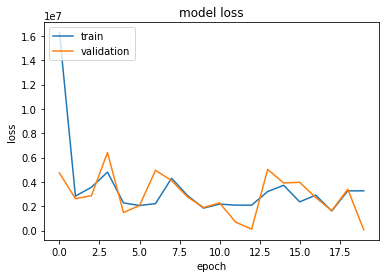

In [238]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [239]:
print("[INFO] predicting history class...")
preds = model.predict(testX)
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiffNew)
std = np.std(absPercentDiffNew)
# finally, show some statistics on our model
print("[INFO] mean: {}%, std: {}%".format(mean, std))

[INFO] predicting history class...
[INFO] mean: 100.82431367520772%, std: 0.27112443816501636%


In [240]:
absPercentDiffNew = []
for i in list(absPercentDiff):
    if i < 1E308:
        absPercentDiffNew.append(i)

# Run Test

In [241]:
Xnew = pd.DataFrame(dfxx.drop(['History_class'], axis=1).iloc[0:2])
answers = pd.DataFrame(dfxx['History_class'].iloc[0:2])

In [242]:
answers

,History_class
0,1.0
1,1.0


In [243]:
Xnew

,Gene,Pathogenic,_method,cancer_dx,cancer_dx_age,consent_approval,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,...,rel_relation_5,rel_relation_6,rel_relation_7,rel_relation_8,rel_relation_9,rel_relation_10,rel_relation_11,rel_relation_12,rel_relation_13,rel_relation_14
0,0.0,0.0,0.0,1.0,0.74026,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.74026,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
model.predict_classes(Xnew)